# Question 1: Countries and Happiness

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import string
import time

In [304]:
happiness_2015_file = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2015.csv")
happiness_2016_file = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2016.csv")
happiness_2017_file = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/World_Happiness_2017.csv")

In [305]:
happiness_2015_file.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [306]:
happiness_2016_file.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [307]:
happiness_2017_file.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


## Preprocessing

In [308]:
happiness_2015 = happiness_2015_file
happiness_2016 = happiness_2016_file
happiness_2017 = happiness_2017_file
# drop features that are not used
happiness_2015 = happiness_2015.drop(['Country', 'Happiness Rank', 'Happiness Score', 'Standard Error'], axis=1)
happiness_2016 = happiness_2016.drop(['Country', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)
happiness_2017 = happiness_2017.drop(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low'], axis=1)
# region is categorical data so convert to binary indicators
happiness_2015 = pd.get_dummies(happiness_2015, columns=['Region'])
happiness_2016 = pd.get_dummies(happiness_2016, columns=['Region'])
data = {'2015':happiness_2015,'2016':happiness_2016,'2017':happiness_2017}
data_files = {'2015':happiness_2015_file,'2016':happiness_2016_file,'2017':happiness_2017_file}
years = ['2015','2016','2017']

## PCA for 2015 and 2016
The data from 2015 and 2016 has a region feature, which was categorical and increases the size of the dataset, so I will use PCA to reduce them.

First I graph the variance to see how much we should reduce.

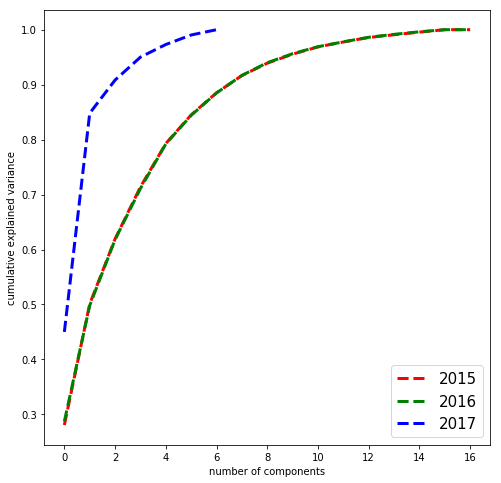

In [309]:
from sklearn.decomposition import PCA
plt.figure(figsize=(8,8))
pca = PCA().fit(data['2015'])
line2015, = plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r--', label='2015', linewidth=3)
pca = PCA().fit(data['2016'])
line2016, = plt.plot(np.cumsum(pca.explained_variance_ratio_), 'g--', label='2016', linewidth=3)
pca = PCA().fit(data['2017'])
line2017, = plt.plot(np.cumsum(pca.explained_variance_ratio_), 'b--', label='2017', linewidth=3)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.legend(handles=[line2015, line2016, line2017], loc='lower right', markerscale=7, fontsize=15)
plt.show()

It looks like with just 6 components we can preserve almost 90% of the data.

In [310]:
num_components = 6
pca = PCA(n_components=num_components)
pca.fit(data['2015'])
data['2015'] = pca.transform(data['2015'])
pca.fit(data['2016'])
data['2016'] = pca.transform(data['2016'])
pca.fit(data['2017'])
data['2017'] = pca.transform(data['2017'])

## Clustering the Dataset

I will test three clustering algorithms: KMeans, Agglomerative, and DBSCAN.

### Elbow Method

First, I will determine the optimal number of clusters by using the elbow method(found at https://pythonprogramminglanguage.com/kmeans-elbow-method/.

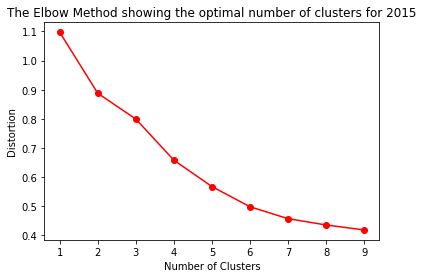

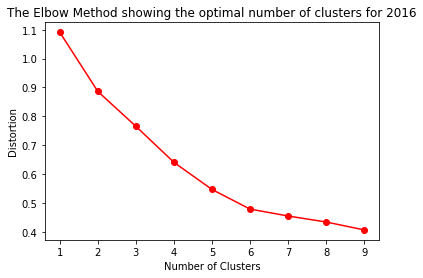

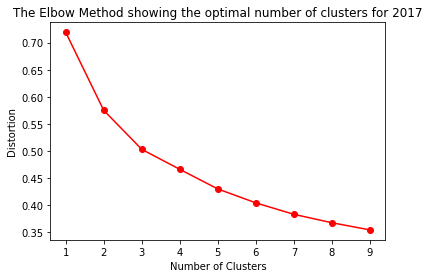

In [311]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

for year in years:
    distortions = []
    K = range(1,10)
    for k in K:
        kmeans = KMeans(n_clusters=k).fit(data[year])
        distortions.append(sum(np.min(cdist(data[year], kmeans.cluster_centers_, 'euclidean'), axis=1)) / data[year].shape[0])
    # Plot the elbow
    plt.plot(K, distortions, 'ro-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal number of clusters for ' + year)
    plt.show()

It appears that the optimal number of clusters is 5.

### KMeans Clustering

In [312]:
num_clusters = 5
labels = {}
labels['kmeans'] = {}
for year in years:
    labels['kmeans'][year] = KMeans(n_clusters=num_clusters).fit_predict(data[year])

### Agglomerative Clustering

In [313]:
from sklearn.cluster import AgglomerativeClustering

labels['agglomerative'] = {}
for year in years:
    labels['agglomerative'][year] = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=num_clusters).fit_predict(data[year])

### DBSCAN Clustering

In [314]:
from sklearn.cluster import DBSCAN

labels['dbscan'] = {}
for year in years:
    db = DBSCAN().fit(data[year])
    labels['dbscan'][year] = db.labels_

## Clustering Visualization

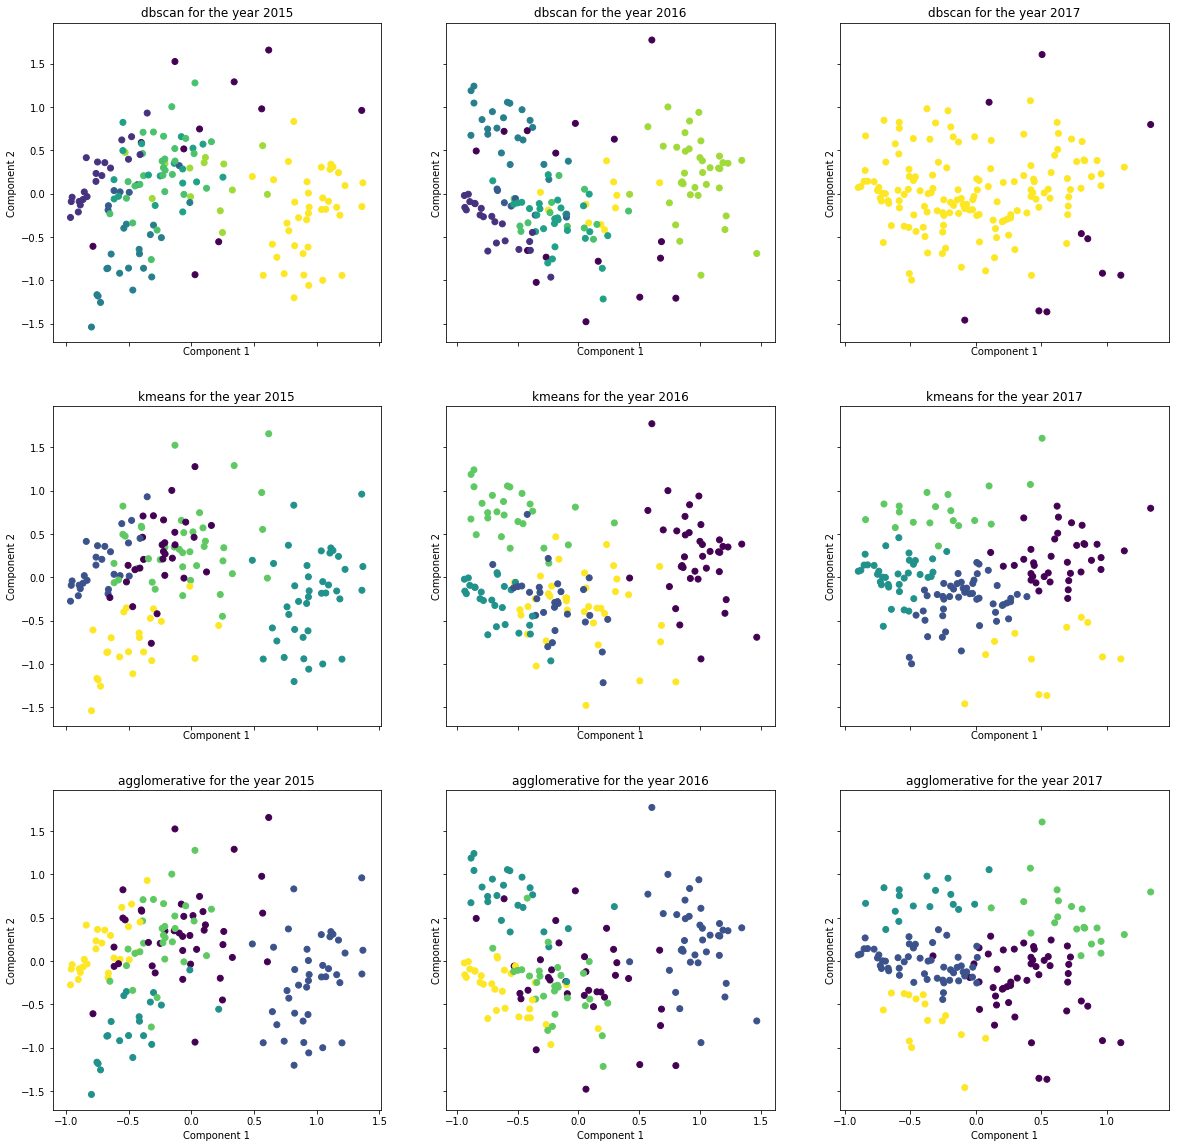

In [315]:
fig, sub = plt.subplots(3, 3, figsize=(20, 20), sharex='col', sharey='row')
for i, k in enumerate(labels.keys()):
    for j, year in enumerate(years):
        sub[i,j].scatter(data[year][:,0], data[year][:,1], c=labels[k][year])
        sub[i,j].set(xlabel='Component 1', ylabel='Component 2', title=k+' for the year ' + year)
plt.show()

# Seriation

For seriation, I will use the same clustering algorithms but every country will be a different cluster, then I will sort the dataset by these cluster rankings. DBSCAN does not let you specify the number of clusters, so it will not be used.

### KMeans Seriation

In [316]:
labels['kmeans_seriation'] = {}
for year in years:
    labels['kmeans_seriation'][year] = KMeans(n_clusters=len(data[year])).fit_predict(data[year])
    data_files[year]['kmeans_seriation'] = labels['kmeans_seriation'][year]

### Agglomerative Seriation

In [317]:
labels['agglomerative_seriation'] = {}
for year in years:
    labels['agglomerative_seriation'][year] = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=len(data[year])).fit_predict(data[year])
    data_files[year]['agglomerative_seriation'] = labels['agglomerative_seriation'][year]

## Seriation Visualization

First I will rank the dataset using the cluster rankings and show the 5 happiest and the 5 saddest according to the seriation.

### KMeans Rankings

In [318]:
for year in years:
    features_drop = set(data_files[year].axes[1].tolist())-set(['Country', 'Happiness Rank', 'Happiness.Rank', 'kmeans_seriation'])
    simplified = data_files[year].drop(features_drop, axis=1)
    print('\nHappiest Countries in ' + year + ' using KMeans\n')
    print(simplified.sort_values(by=['kmeans_seriation'], ascending=False).head())
    print('\nSaddest Countries in ' + year + ' using KMeans\n')
    print(simplified.sort_values(by=['kmeans_seriation'], ascending=True).head())


Happiest Countries in 2015 using KMeans

       Country  Happiness Rank  kmeans_seriation
139    Comoros             140               157
3       Norway               4               156
29   Argentina              30               155
86      Serbia              87               154
47     Ecuador              48               153

Saddest Countries in 2015 using KMeans

      Country  Happiness Rank  kmeans_seriation
88     Latvia              89                 0
121  Ethiopia             122                 1
49      Italy              50                 2
15     Brazil              16                 3
109      Iran             110                 4

Happiest Countries in 2016 using KMeans

        Country  Happiness Rank  kmeans_seriation
87   Montenegro              88               156
1   Switzerland               2               155
55       Russia              56               154
5        Canada               6               153
44     Slovakia              45            

### Agglomerative Rankings

In [319]:
for year in years:
    features_drop = set(data_files[year].axes[1].tolist())-set(['Country', 'Happiness Rank', 'Happiness.Rank', 'agglomerative_seriation'])
    simplified = data_files[year].drop(features_drop, axis=1)
    print('\nHappiest Countries in ' + year + ' using Agglomerative\n')
    print(simplified.sort_values(by=['agglomerative_seriation'], ascending=False).head())
    print('\nSaddest Countries in ' + year + ' using Agglomerative\n')
    print(simplified.sort_values(by=['agglomerative_seriation'], ascending=True).head())


Happiest Countries in 2015 using Agglomerative

                Country  Happiness Rank  agglomerative_seriation
50              Bolivia              51                      157
24               Panama              25                      156
0           Switzerland               1                      155
40  Trinidad and Tobago              41                      154
8           New Zealand               9                      153

Saddest Countries in 2015 using Agglomerative

         Country  Happiness Rank  agglomerative_seriation
157         Togo             158                        0
156      Burundi             157                        1
154        Benin             155                        2
155        Syria             156                        3
152  Afghanistan             153                        4

Happiest Countries in 2016 using Agglomerative

        Country  Happiness Rank  agglomerative_seriation
85       Serbia              86                      156
1 

I think that the Agglomerative Seriation performed better than the KMeans Seriation.

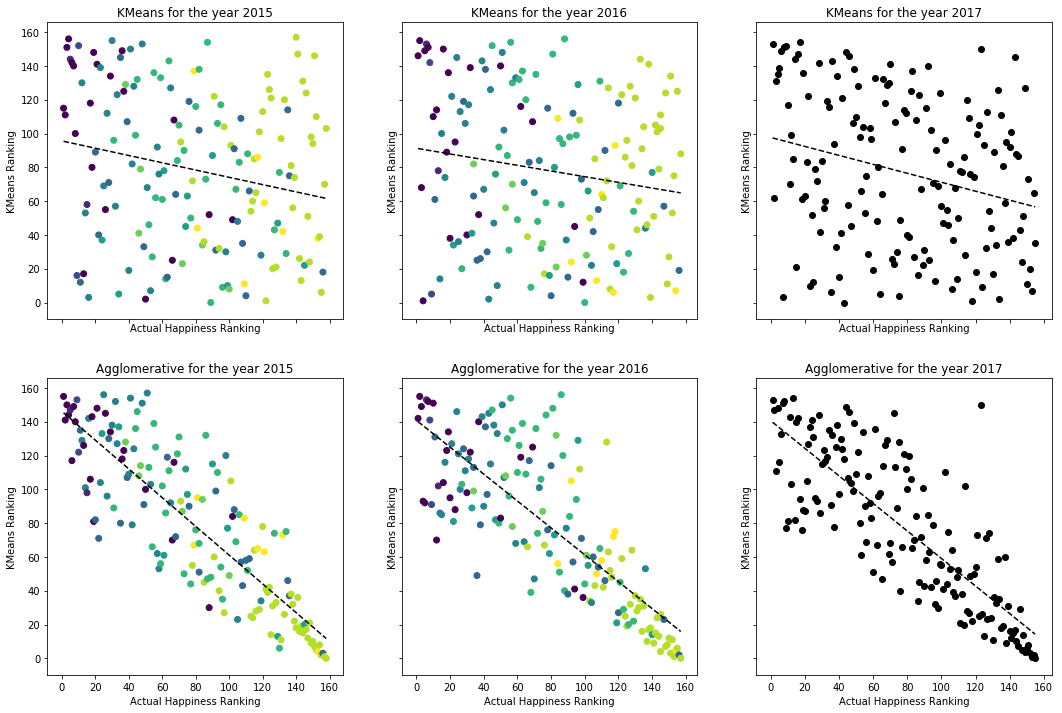

In [320]:
fig, sub = plt.subplots(2, 3, figsize=(18, 12), sharex='col', sharey='row')
for j, year in enumerate(years):
    if year != '2017':
        region_numbers = {b:a for a ,b in enumerate(data_files[year]['Region'].unique())}
        sub[0,j].scatter(data_files[year]['Happiness Rank'], data_files[year]['kmeans_seriation'], c=[region_numbers[e] for e in data_files[year]['Region']])
        z = np.polyfit(data_files[year]['Happiness Rank'], data_files[year]['kmeans_seriation'], 1)
        p = np.poly1d(z)
        sub[0,j].plot(data_files[year]['Happiness Rank'],p(data_files[year]['Happiness Rank']),'k--')
    else:
        sub[0,j].scatter(data_files[year]['Happiness.Rank'], data_files[year]['kmeans_seriation'], c='#000000')
        z = np.polyfit(data_files[year]['Happiness.Rank'], data_files[year]['kmeans_seriation'], 1)
        p = np.poly1d(z)
        sub[0,j].plot(data_files[year]['Happiness.Rank'],p(data_files[year]['Happiness.Rank']),'k--')
    sub[0,j].set(xlabel='Actual Happiness Ranking', ylabel='KMeans Ranking', title='KMeans for the year ' + year)
for j, year in enumerate(years):
    if year != '2017':
        region_numbers = {b:a for a ,b in enumerate(data_files[year]['Region'].unique())}
        sub[1,j].scatter(data_files[year]['Happiness Rank'], data_files[year]['agglomerative_seriation'], c=[region_numbers[e] for e in data_files[year]['Region']])
        z = np.polyfit(data_files[year]['Happiness Rank'], data_files[year]['agglomerative_seriation'], 1)
        p = np.poly1d(z)
        sub[1,j].plot(data_files[year]['Happiness Rank'],p(data_files[year]['Happiness Rank']),'k--')
    else:
        sub[1,j].scatter(data_files[year]['Happiness.Rank'], data_files[year]['agglomerative_seriation'], c='#000000')
        z = np.polyfit(data_files[year]['Happiness.Rank'], data_files[year]['agglomerative_seriation'], 1)
        p = np.poly1d(z)
        sub[1,j].plot(data_files[year]['Happiness.Rank'],p(data_files[year]['Happiness.Rank']),'k--')
    sub[1,j].set(xlabel='Actual Happiness Ranking', ylabel='KMeans Ranking', title='Agglomerative for the year ' + year)
plt.show()

It is clear from these graphs that Agglomerative Seriation much more closely finds happiness rankings. There is a strong negative correlation between happiness ranking and cluster ranking. It is also interesting that regions (colors) are grouped along high and low happiness.

A. Without using any "Happiness" information given, conduct proper Clusterings Analyses and describe these clusters.¶

    KMeans found clean clusters in the data when viewed using the first two components.

B. Without using any "Happiness" information given, conduct proper Seriation Analyses and compare the generated order with the \
"Happiness" ranking.

    The trend line of the Agglomerative Seriation is very strong.

C. Report your findings, including investigations and discussions to support or reflute the following remarks:

 1) Norway tops the global happiness rankings for all three years 2015, 2016, and 2017

    Norway only makes the top 5 in 2017. However it is very happy still in 2015 and 2016.

 2) All top ten countries rank highly on all the main features found to support happiness

    The algorithms found this to be generally true for Health and Economy and Freedom

 3) Happiness is both social and personal

    This seems true from the data.

 4) Unemployment causes a major fall in happiness, and even for those in work the quality of work can cause major variations in happiness
 
     Because Economy and Happiness are so coorelated, this could be true.

 5) China are no happier than most countries, though richer and longer longevity

 6) Much of Africa is struggling
 
     The African region is at the bottom of both the Happiness Ranking and the Agglomerative Ranking

 7) Happiness has fallen in America